Zacznijmy od udowodnienia równoważności RSS gain maximization i total RSS minimization:
 Idea:
 Total RSS minimization zawiera wspólną część sumy dla każdego możliwego parent (którą możemy wyciągnąć). Jest ona równa total RSS drzewa 
  T przed dodatkowym podziałem - a poszczególne podziały różnią się między sobą o dokładnie rss gain.
  
$(P, X^*_j, t^*)=\text{argmin}_{P, X_j, t} \sum_{m \in \text{Leaves}(T(P, X_j, t))} \sum_{i \in R_m }(y_i - \overline{y}_{R_m})$
 
Niech $q_i$ będzie oznaczeniem analogicznym do $\overline{y}_{i}$, oraz $W_i$ do $R_i$ jednak dla drzewa $T$ 


Wtedy:


$(P, X^*_j, t^*)=\text{argmin}_{P, X_j, t} \sum_{m \in \text{Leaves}(T(P, X_j, t))} \sum_{i \in R_m }(y_i - \overline{y}_{R_m}) =\text{argmin}_{P, X_j, t}( \sum_{m \in \text{Leaves}(T)} \sum_{i \in W_m }(y_i - q_i)^2 - \sum_{i \in W_P} (y_i-q_i)^2 + \sum_{m=1}^2 \sum_{R_m(X_j, t)} (y_i - \overline{y}_{R_m})^2)$

Tak jak widzimy 'wyciąneliśmy' błąd na drzewie T, a następnie odejmujemy błąd w Parent, aby dodać błąd jego nowo utworzonych dzieci. Oczywiście błąd na drzewie $T$, czyli:

$ \sum_{m \in \text{Leaves}(T)} \sum_{i \in W_m }(y_i - q_i)^2$, jest niezależny od obranego podziału (czyli parametrów $P$, $X_j$, $t$), zatem:


$\text{argmin}_{P, X_j, t}( \sum_{m \in \text{Leaves}(T)} \sum_{i \in W_m }(y_i - q_i)^2 - \sum_{i \in W_P} (y_i-q_i)^2 + \sum_{m=1}^2 \sum_{R_m(X_j, t)} (y_i - \overline{y}_{R_m})^2) =$


$\text{argmin}_{P, X_j, t}( -\sum_{i \in W_P} (y_i-q_i)^2 + \sum_{m=1}^2 \sum_{R_m(X_j, t)} (y_i - \overline{y}_{R_m})^2) =$

 
$
\text{argmax}_{P, X_j, t}(\sum_{i \in W_P} (y_i-q_i)^2 - \sum_{m=1}^2 \sum_{R_m(X_j, t)} (y_i - \overline{y}_{R_m})^2) = \text{RSS Gain}$



Chcemy jeszcze pokazać, że Local RSS Minimization != RSS Gain Maximization. Rozpatrzmy drzewo T posiadające jedynie dwa liście:
- liść pierwszy w którym mamy 80 osób ze wzrostem 170 i wagą 1070, 20 osób ze wzrostem 170 i wagą 1080, oraz 100 osób ze wzrostem 200 i wagą 1100
- liść drugi zawierający 9 osób ze wzrostem 80 i wagą 20, oraz 1 osobę ze wzrostem 140 i wagą 30

Próbujemy dokonać predykcji wagi na podstawie wzrostu. W oczywisty sposób Local RSS Minimization wyberze podział liścia drugiego po wzroście 110 - ponieważ RSS w powstałych child nodes wyniesie 0.Zwróćmy jednak uwagę jaki będzie RSS Gain dla obu z liści (podział pierwszego po wzroście 185 i drugiego po wzroście 110): 

Dla liścia pierwszego:
$80 \cdot 16^2 + 20 \cdot 6^2 + 100 \cdot 14^2  - 0 - 80 \cdot 2^2 + 20 \cdot 8^2 = 40800-1600 = 39600$


Dla liścia drugiego:
$9 \cdot 1^2 + 1 \cdot 9^2 - 0 = 90$

Zatem zgodnie z RSS Gain Maximization wybralibyśmy podział pierwszego liścia po wzroście 185.

Oczywiście wynika z tego również, że Local RSS Minimization != Total RSS Minimization.

In [1]:
X = [200] * 100 + [170] * 80 + [170] * 20 + [80] * 9 + [140]
y = [1100] * 100 + [1070] * 80 + [1080] * 20 + [20] * 9 + [30]

In [2]:
import numpy as np

X = np.array(X).reshape(-1, 1)
y = np.array(y)

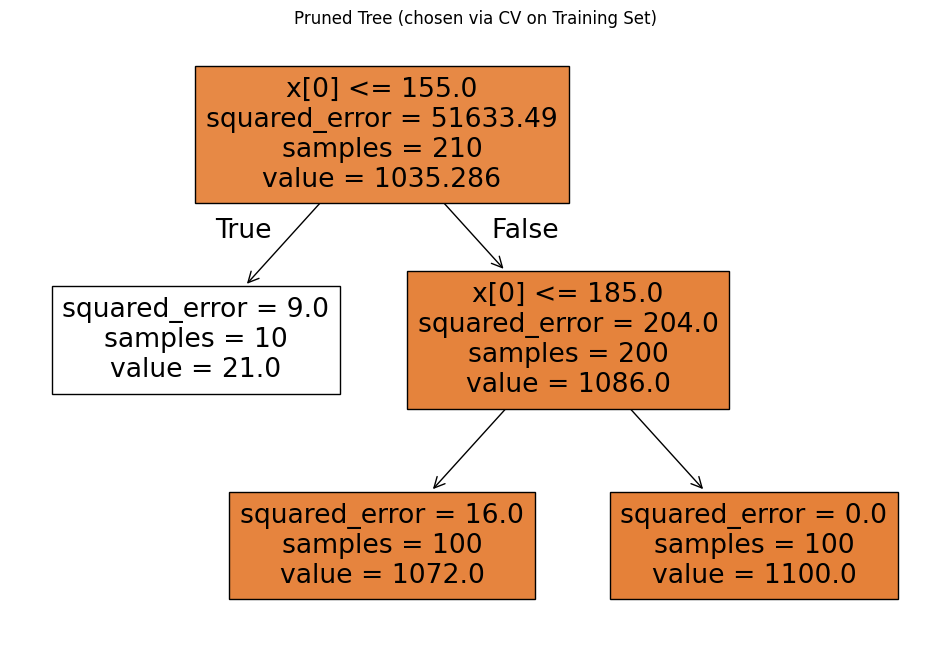

In [3]:
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

dtr = DecisionTreeRegressor(max_leaf_nodes = 3)
dtr.fit(X, y)
from sklearn.tree import plot_tree
plt.figure(figsize=(12,8))
plot_tree(
    dtr,
    filled=True
)
plt.title("Pruned Tree (chosen via CV on Training Set)")
plt.show()


Widzimy więc że scikit-learn używa RSS Gain Maximization = Total RSS Minimization

Konkluzje:

1. Local RSS Minimization "preferuje" podziały podzbiorów o mniejszej liczbie próbek, ze względu na to że minimalizujemy sumę po próbkach, nie skalując w żaden sposób wyniku w zależności od liczby próbek. 
   Analogicznie RSS Gain Maximization maksymalizuje swoją sumę, więc preferuje podziały podzbiorów o większej liczbie
2. Local RSS Minimization preferuje podziały podzbiorów o mniejszym błędzie predykcji, ponieważ wybiera ten wierzchołek, w którym po przeprowadzonym podziale otrzymamy najmniejszy błąd.
3. Z równoważności RSS Gain Maximization i Total RSS Minimization wiemy, że RSS Gain Maximization wybiera najlepszy możliwy dodatkowy podział w danym momencie względem błędu RSS dla całego drzewa.